# Wine Reviewer: winemag-data_first150k数据集分析与预处理

## 1.导入文件和使用的函数库，并查看前五行

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
data = pd.read_csv("/Users/liuhao/Desktop/刘豪_3120191022/wine-reviews/winemag-data_first150k.csv", index_col=0)
data.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150930 entries, 0 to 150929
Data columns (total 10 columns):
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 12.7+ MB


### 可以看出数据集有150930行，10列，其中数值属性2列，标称属性8列。

# 2.数据可视化和摘要

### 2.1 标称属性数据摘要：
上述表格给出的属性，共有8个标称属性，统计其频数

In [3]:
data['country'].value_counts()

US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
England 

In [4]:
data['description'].value_counts()

Powerful in Zinny character, this blend of Dry Creek and Russian River grapes bursts with brawny flavors of wild berries, chocolate-covered mint, tobacco and pepper, wrapped into sturdy tannins. Shows real class and character.                                                                                                                                                                                    6
92-94 Barrel sample. A rounded wine, its tannins submerged into the ripe fruits. It feels soft, and there is just a bite of alcohol. The structure is soft, generous, opulent.                                                                                                                                                                                                                                        6
86-88 This could work as a rich wine, because there is good structure and piles of botrytis. It could be delicious, with its lovely dry finish, but that's for the future.              

In [5]:
data['designation'].value_counts()

Reserve                    2752
Reserva                    1810
Estate                     1571
Barrel sample              1326
Riserva                     754
                           ... 
Reserve Rare Cream            1
Sydney Vineyard               1
Fabla Old Vines               1
Therese                       1
Estate Bellissima Rossa       1
Name: designation, Length: 30621, dtype: int64

In [6]:
data['province'].value_counts()

California                                44508
Washington                                 9750
Tuscany                                    7281
Bordeaux                                   6111
Northern Spain                             4892
                                          ...  
Cape South Coast                              1
Santa Barbara County-Condrieu                 1
Slovenska Istra                               1
Pocerina                                      1
Vino da Tavola della Svizzera Italiana        1
Name: province, Length: 455, dtype: int64

In [7]:
data['region_1'].value_counts()

Napa Valley                             6209
Columbia Valley (WA)                    4975
Mendoza                                 3586
Russian River Valley                    3571
California                              3462
                                        ... 
McLaren Vale-Padthaway                     1
Vin de Pays de l'Ile de Beauté             1
Mazoyeres-Chambertin                       1
Vin de Pays des Coteaux de L'Ardeche       1
Arlanza                                    1
Name: region_1, Length: 1236, dtype: int64

In [8]:
data['region_2'].value_counts()

Central Coast              13057
Sonoma                     11258
Columbia Valley             9157
Napa                        8801
California Other            3516
Willamette Valley           3181
Mendocino/Lake Counties     2389
Sierra Foothills            1660
Napa-Sonoma                 1645
Finger Lakes                1510
Central Valley              1115
Long Island                  771
Southern Oregon              662
Oregon Other                 661
North Coast                  632
Washington Other             593
South Coast                  198
New York Other               147
Name: region_2, dtype: int64

In [9]:
data['variety'].value_counts()

Chardonnay                  14482
Pinot Noir                  14291
Cabernet Sauvignon          12800
Red Blend                   10062
Bordeaux-style Red Blend     7347
                            ...  
Muscat Hamburg                  1
Azal                            1
Cabernet-Shiraz                 1
Vitovska                        1
Rufete                          1
Name: variety, Length: 632, dtype: int64

In [10]:
data['winery'].value_counts()

Williams Selyem                 374
Testarossa                      274
DFJ Vinhos                      258
Chateau Ste. Michelle           225
Columbia Crest                  217
                               ... 
Mascarello Giuseppe e Figlio      1
Château Castel des Maures         1
Prince Michel                     1
Ciro Picariello                   1
Domaine Jean-Philippe Fichet      1
Name: winery, Length: 14810, dtype: int64

### 2.2 数值属性数据摘要：
上述表格给出的属性，共有2个数值属性，计算5数概括及缺失值的个数

In [11]:
def Five_Number_Summary_Null(x):
    return pd.Series([x.name,x.min(),x.quantile(.25),x.median(),x.quantile(.75),x.max(),x.isnull().sum()], 
                     index = ['数值属性:','Minimum:','Q1:','Median:','Q3:','Maximum:','缺失值个数:'])

Five_Number_Summary_Null(data['points'])

数值属性:       points
Minimum:        80
Q1:             86
Median:         88
Q3:             90
Maximum:       100
缺失值个数:           0
dtype: object

In [12]:
Five_Number_Summary_Null(data['price'])

数值属性:       price
Minimum:        4
Q1:            16
Median:        24
Q3:            40
Maximum:     2300
缺失值个数:      13695
dtype: object

### 2.3 数据可视化 

数值属性: points
缺失值个数: 0


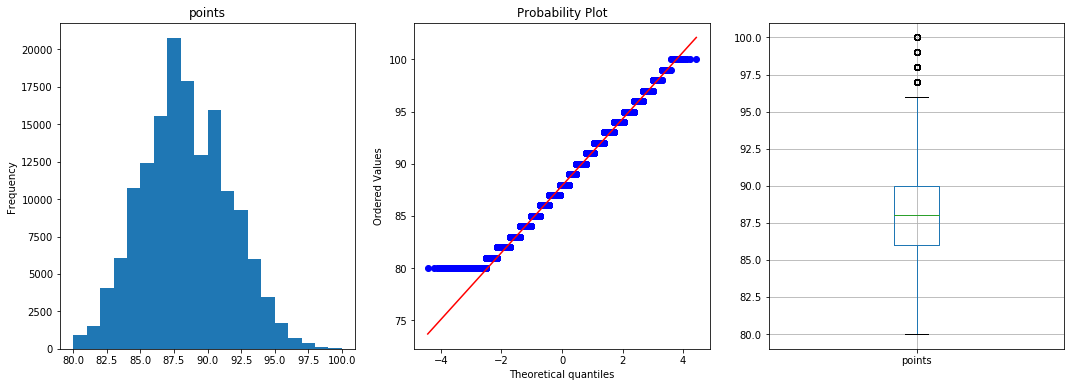

In [13]:
def visualize(x):
    print("数值属性:",x.name)
    print('缺失值个数:',x.isnull().sum())
    plt.figure(figsize=(18, 6))
    plt.subplot(131)
    x.plot.hist(grid=False,bins=20,title=x.name)
    plt.subplot(132)
    stats.probplot(x, dist="norm", plot=plt)#检测数据分布
    plt.subplot(133)
    pd.DataFrame({x.name:x}).boxplot()
    plt.show()
    
visualize(data['points'])

### 数值属性"points"：由直方图可以看出，数据近似呈现正态分布，由qq图看出数据点都近似分布在一条直线附近，进一步验证了数值属性points符合正态分布。由盒图可以看出有两个离群点。

数值属性: price
缺失值个数: 13695


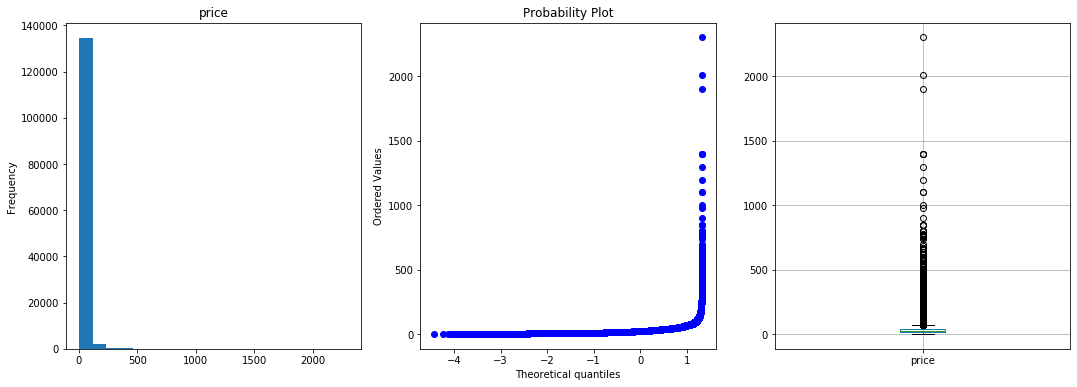

In [14]:
visualize(data['price'])

### 数值属性"price"：由直方图可以看出，数据绝大多数小于500，由qq图看出数据点不呈直线，说明了数值属性price不符合正态分布。由盒图可以看出有非常多的离群点。

# 3.数据缺失处理

### "price"属性有13695个缺失值，缺失原因可能是有些价格不是很好收集，或者有些稀有酒价格不好定义

### 3.1 将缺失部分剔除，并重新可视化数据

数值属性: price
缺失值个数: 0


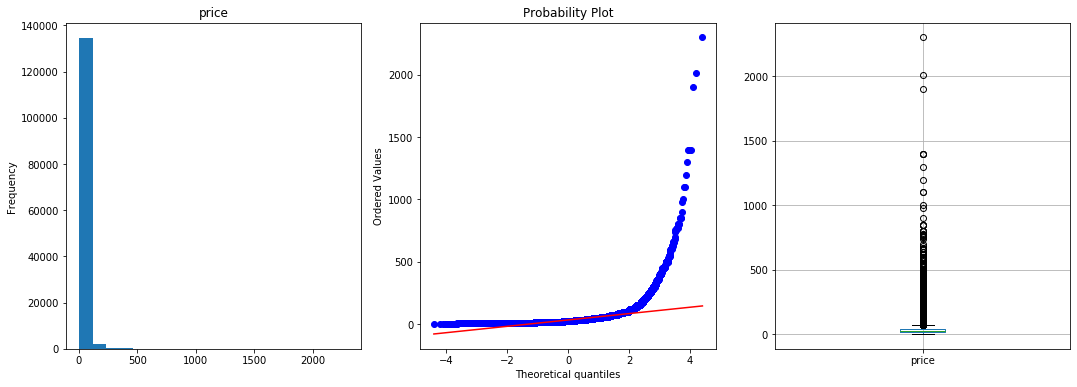

In [15]:
visualize(data['price'].dropna())

### 结论：处理后缺失值的个数为0，但可视化后可以发现，其分布并没有和以前有很大差距，可能因为缺失数据太少，剔除缺失值并不能显著改变原来的数据分布特性。

### 3.2 用最高频率值来填补缺失值，并重新可视化数据

数值属性: price
缺失值个数: 0


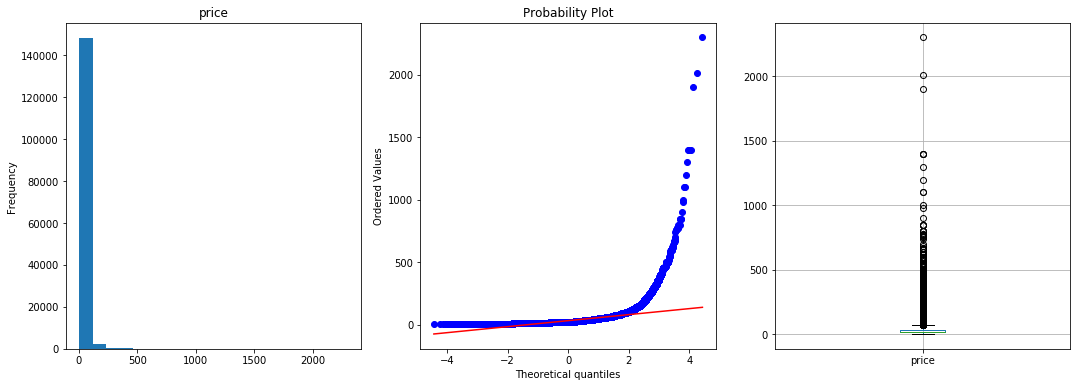

In [16]:
visualize(data['price'].fillna(data['price'].mode()[0]))

### 结论：处理后缺失值的个数为0，可视化后其分布并没有和以前有很大差距，可能因为缺失数据太少，而频率最高值的加入并不能显著改变原来的数据分布特性。

### 3.3 通过属性的相关关系来填补缺失值，并重新可视化数据

### 用'points'数值属性来预测缺失值，随机森林拟合结果如下

数值属性: price
缺失值个数: 0


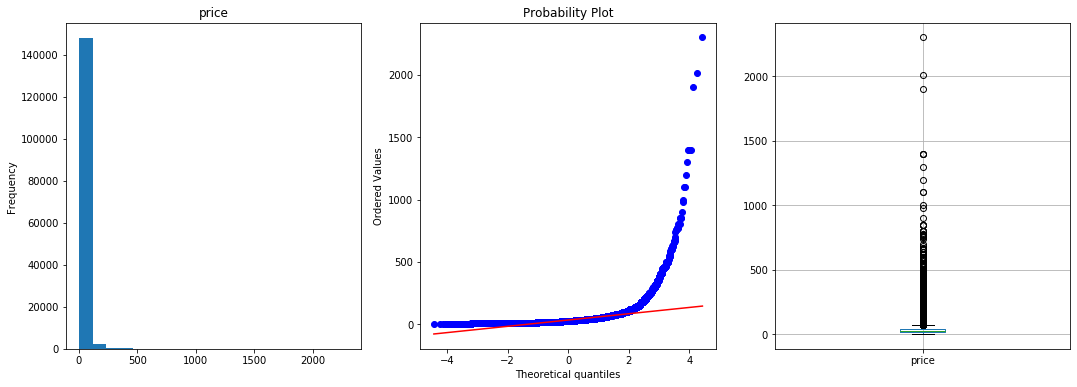

In [17]:
train=data[data['price'].notnull()]
X, Y=train[['points']], train[['price']]
test=data[data['price'].isnull()]
points=test[['points']]
price=test['price']
model=RandomForestRegressor(n_estimators=100,oob_score=True,random_state=1)
model.fit(X,Y.values.ravel())
predicted_Price=model.predict(points)
data_pred = data.copy()#copy一份，防止影响原数据
data_pred.loc[(data['price'].isnull()),'price']=predicted_Price
visualize(data_pred['price'])

### 结论：处理后缺失值的个数为0，可视化后其分布并没有和以前有很大差距，可能因为缺失数据太少，并且仅由‘points’一列来进行相关关系分析，效果不好也在情理之中。

### 3.4 通过数据对象之间的相似性来填补缺失值，并重新可视化数据

###  用knn算法来寻找相似性

数值属性: price
缺失值个数: 0


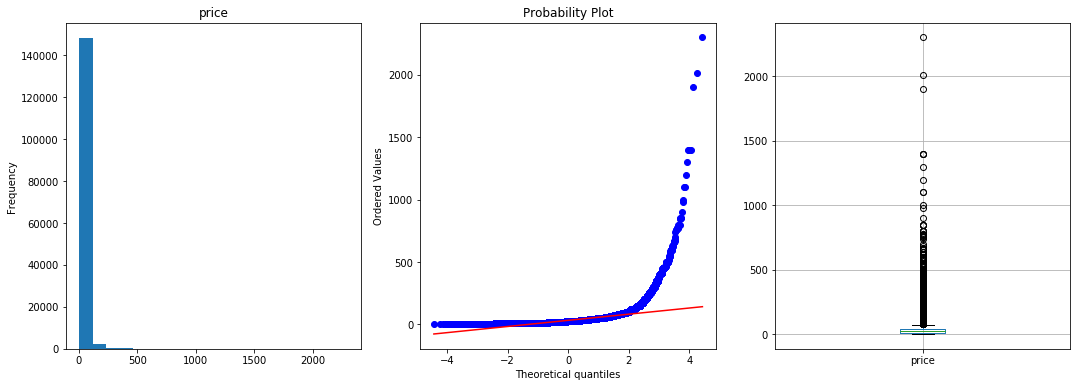

In [18]:
train=data[data['price'].notnull()]
X, Y=train[['points']], train[['price']]
test=data[data['price'].isnull()]
points=test[['points']]
price=test['price']
clf=KNeighborsClassifier(n_neighbors=3,weights='distance')#3临域
clf.fit(X,Y.values.ravel())
predicted_Price=clf.predict(points)
data_pred_knn = data.copy()
data_pred_knn.loc[(data['price'].isnull()),'price']=predicted_Price
visualize(data_pred_knn['price'])

### 结论：处理后缺失值的个数为0，可视化后其分布并没有和以前有很大差距，可能因为缺失数据太少，并且仅由‘points’一列来进行相似性分析，效果不好也在情理之中。